<a href="https://colab.research.google.com/github/tpavan03/Phishing-Detection/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The DataSet used for this project is collected from UCI Machine Learning Repository  [PhiUSIIL Phishing URL (Website) - UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset).**

***This DataSet has 56 columns and 235795 entries which contains 134850 Benign(Legitimate) website URLs and 100945 Malicious website URLs.***


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/PhiUSIIL_Phishing_URL_Dataset.csv")

In [ ]:
df

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [ ]:
df.shape

(235795, 56)

In [ ]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


**Check whether there are any null values**

In [ ]:
df.isnull().sum()

,0
FILENAME,0
URL,0
URLLength,0
Domain,0
DomainLength,0
IsDomainIP,0
TLD,0
URLSimilarityIndex,0
CharContinuationRate,0
TLDLegitimateProb,0


**As there are no null values,now let's check if there are any duplicate entries in our data.**

In [ ]:
df.duplicated().sum()

0

**We have seen that there are no null values or duplicate values in our data.But,that dosen't mean there are no missing values as they can be represented in other ways too..**

***Now,let's check for any missing or NaN values.***

In [ ]:
for column in df.columns:
    print(column,(df[column]=='Missing').sum())

FILENAME 0
URL 0
URLLength 0
Domain 0
DomainLength 0
IsDomainIP 0
TLD 0
URLSimilarityIndex 0
CharContinuationRate 0
TLDLegitimateProb 0
URLCharProb 0
TLDLength 0
NoOfSubDomain 0
HasObfuscation 0
NoOfObfuscatedChar 0
ObfuscationRatio 0
NoOfLettersInURL 0
LetterRatioInURL 0
NoOfDegitsInURL 0
DegitRatioInURL 0
NoOfEqualsInURL 0
NoOfQMarkInURL 0
NoOfAmpersandInURL 0
NoOfOtherSpecialCharsInURL 0
SpacialCharRatioInURL 0
IsHTTPS 0
LineOfCode 0
LargestLineLength 0
HasTitle 0
Title 0
DomainTitleMatchScore 0
URLTitleMatchScore 0
HasFavicon 0
Robots 0
IsResponsive 0
NoOfURLRedirect 0
NoOfSelfRedirect 0
HasDescription 0
NoOfPopup 0
NoOfiFrame 0
HasExternalFormSubmit 0
HasSocialNet 0
HasSubmitButton 0
HasHiddenFields 0
HasPasswordField 0
Bank 0
Pay 0
Crypto 0
HasCopyrightInfo 0
NoOfImage 0
NoOfCSS 0
NoOfJS 0
NoOfSelfRef 0
NoOfEmptyRef 0
NoOfExternalRef 0
label 0


In [ ]:
for column in df.columns:
    print(column,(df[column]=='NaN').sum())

FILENAME 0
URL 0
URLLength 0
Domain 0
DomainLength 0
IsDomainIP 0
TLD 0
URLSimilarityIndex 0
CharContinuationRate 0
TLDLegitimateProb 0
URLCharProb 0
TLDLength 0
NoOfSubDomain 0
HasObfuscation 0
NoOfObfuscatedChar 0
ObfuscationRatio 0
NoOfLettersInURL 0
LetterRatioInURL 0
NoOfDegitsInURL 0
DegitRatioInURL 0
NoOfEqualsInURL 0
NoOfQMarkInURL 0
NoOfAmpersandInURL 0
NoOfOtherSpecialCharsInURL 0
SpacialCharRatioInURL 0
IsHTTPS 0
LineOfCode 0
LargestLineLength 0
HasTitle 0
Title 0
DomainTitleMatchScore 0
URLTitleMatchScore 0
HasFavicon 0
Robots 0
IsResponsive 0
NoOfURLRedirect 0
NoOfSelfRedirect 0
HasDescription 0
NoOfPopup 0
NoOfiFrame 0
HasExternalFormSubmit 0
HasSocialNet 0
HasSubmitButton 0
HasHiddenFields 0
HasPasswordField 0
Bank 0
Pay 0
Crypto 0
HasCopyrightInfo 0
NoOfImage 0
NoOfCSS 0
NoOfJS 0
NoOfSelfRef 0
NoOfEmptyRef 0
NoOfExternalRef 0
label 0


In [ ]:
df["label"].value_counts()

,count
label,
1,134850
0,100945


# **Now we will analyse our data using different plots and maps**

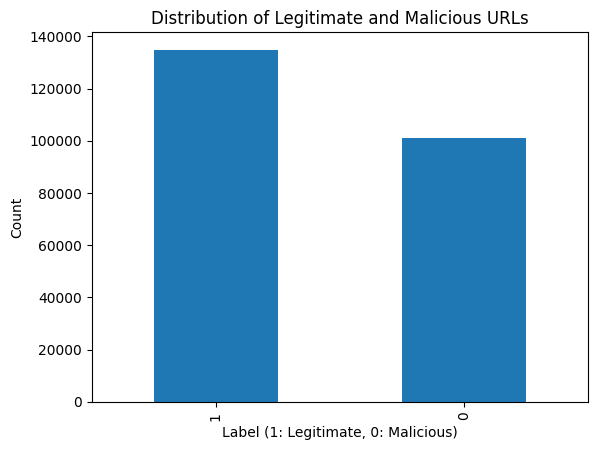

In [ ]:
df['label'].value_counts().plot(kind='bar')
plt.title('Distribution of Legitimate and Malicious URLs')
plt.xlabel('Label (1: Legitimate, 0: Malicious)')
plt.ylabel('Count')
plt.show()

# **Histogram**

**We can use histograms with hue="label" for comparing the distribution of  feature across legitimate and malicious URLs.**

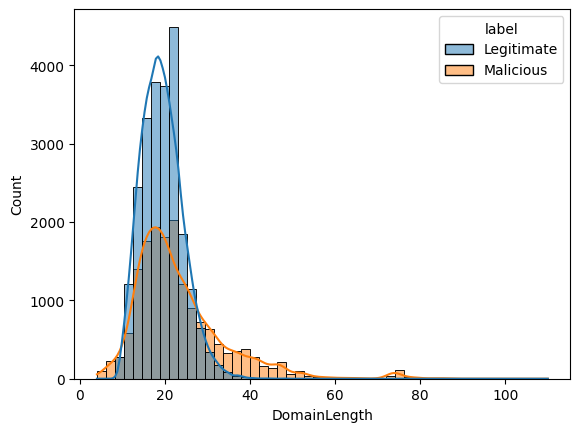

In [4]:
label_map = {0: 'Malicious', 1: 'Legitimate'}
df['label'] = df['label'].replace(label_map)
sns.histplot(data=df, x="DomainLength", hue="label", kde=True, bins=50)
plt.show()

# **Correlation Heatmap**
**We can understand the correlation between different features and identify any strong relationships between all the numerical features using correlation heatmap.**

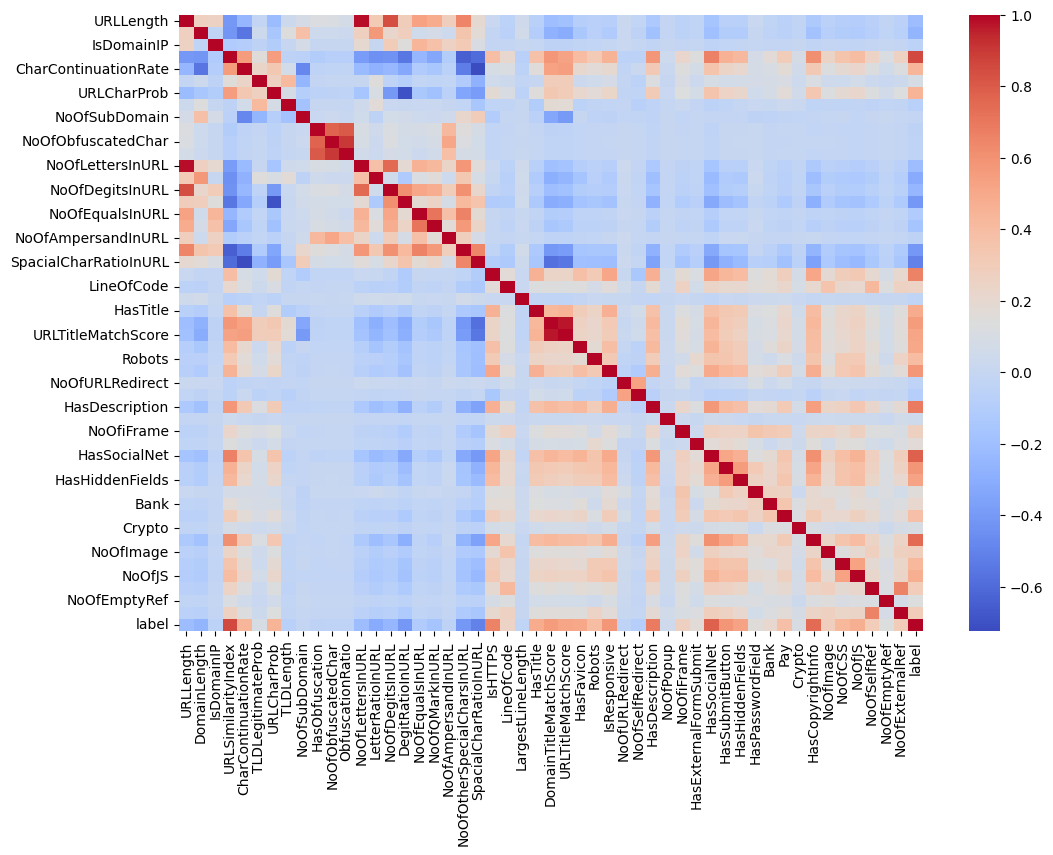

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm", fmt=".2f") # Set numeric_only to True to only include numerical columns in the correlation calculation
plt.show()


# **Pairplot**
**We can visualize relationships between multiple features and how they relate to the target label by keeping hue = 'label' using pairplot.**

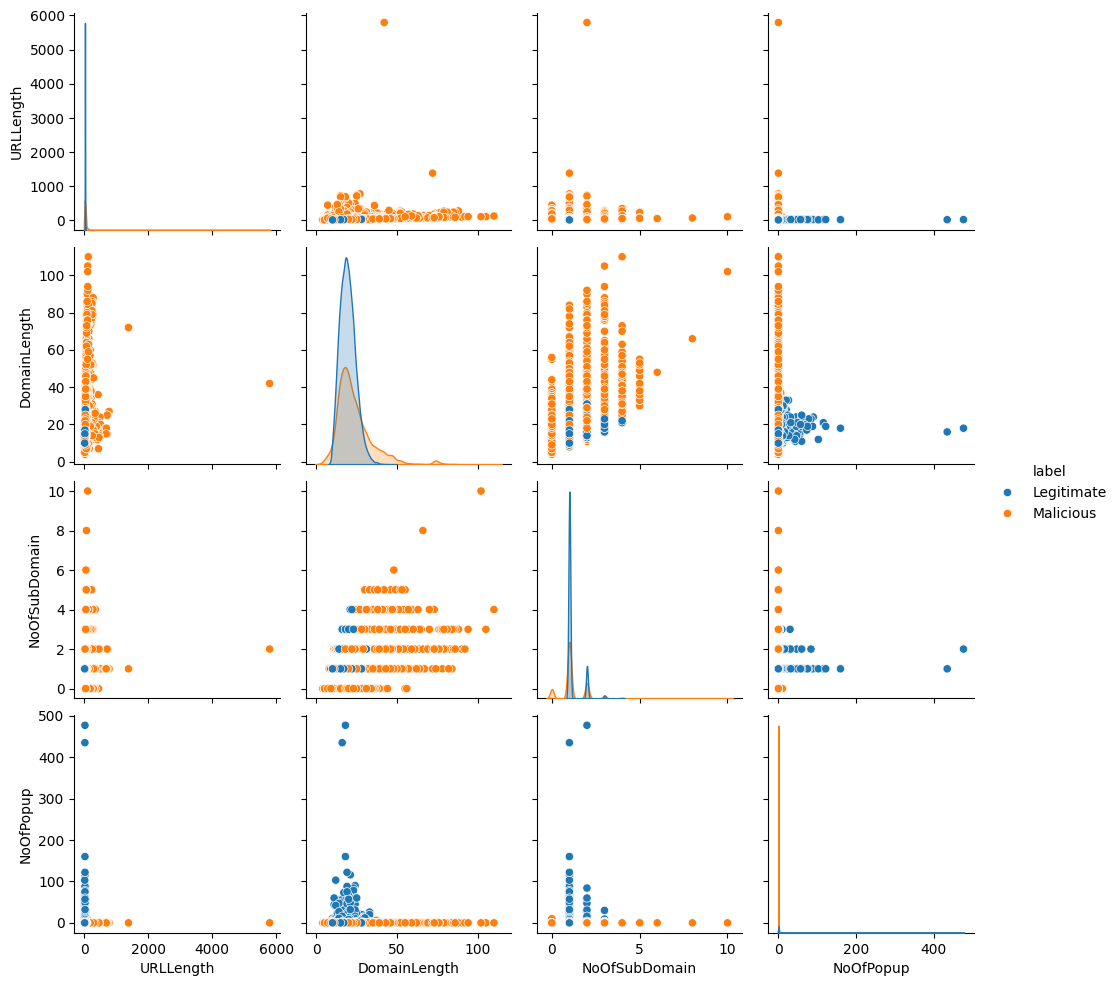

In [5]:
sns.pairplot(df[['URLLength', 'DomainLength', 'NoOfSubDomain', 'NoOfPopup', 'label']], hue='label')
plt.show()


# **Boxplot**
**We compare the distribution and spread of number of sub domains for legitimate vs malicious URLs.**

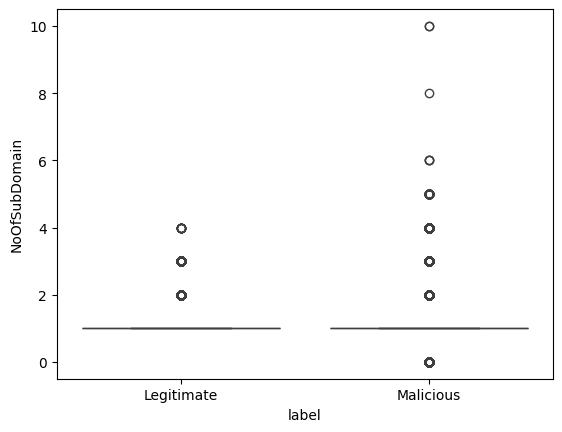

In [ ]:
sns.boxplot(x="label", y="NoOfSubDomain", data=df)
plt.show()

# Countplots
 **We can see how categorical features vary between legitimate and malicious URLs using countplots as displayed.**

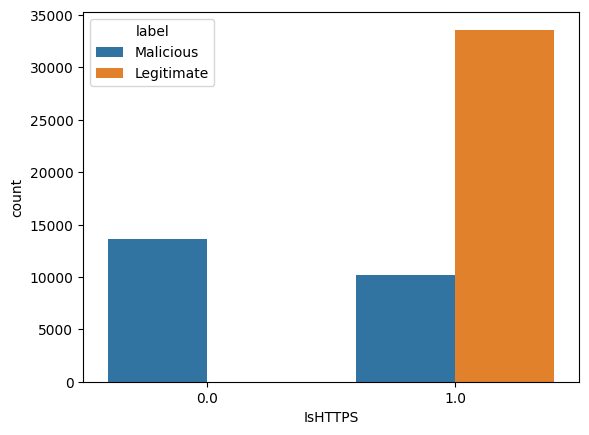

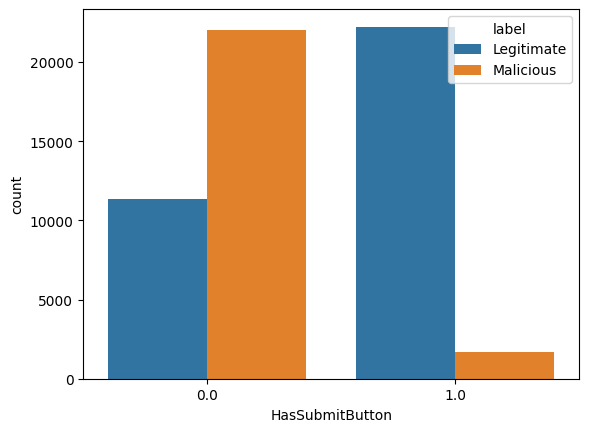

In [ ]:
sns.countplot(x="IsHTTPS", hue="label", data=df)
plt.show()
sns.countplot(x="HasSubmitButton", hue="label", data=df)
plt.show()

# **Violinplot**

We can compare distribution of Number of Sub Domains across labels while also seeing the density using violinplot.

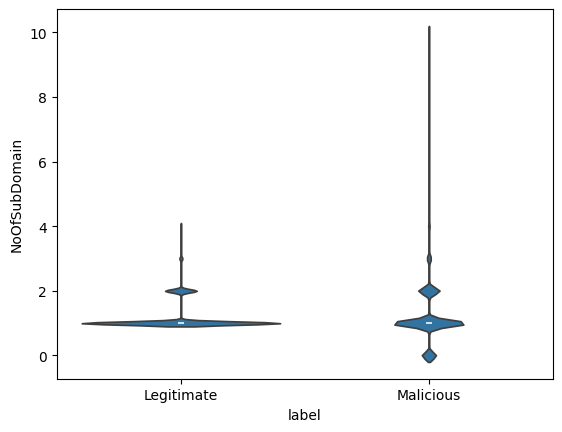

In [ ]:
sns.violinplot(x="label", y="NoOfSubDomain", data=df)
plt.show()

# **Scatterplot**
**We can explore the relationship between two numerical features and how they relate to the target label using scatterplots as shown**

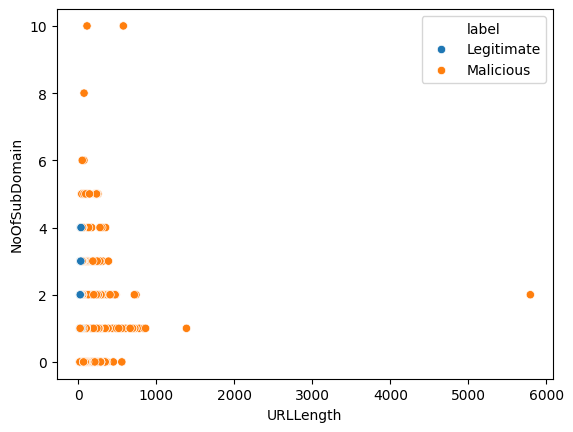

In [ ]:
sns.scatterplot(x="URLLength", y="NoOfSubDomain", hue="label", data=df)
plt.show()

# **Barplot**
**For features like HasFavicon and other binary features, bar plots can show how the percentages differ for the target classes and helps in caluculating proportions between them.**

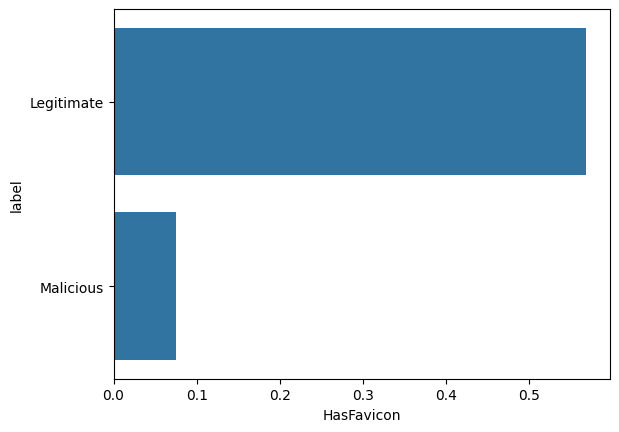

In [ ]:
sns.barplot(x="HasFavicon", y="label", data=df, errorbar=None)
plt.show()

**Boxen Plots help in finding out the diversity of density of important features such as Digits and Letters Ratio in a URL w.r.t labels.**

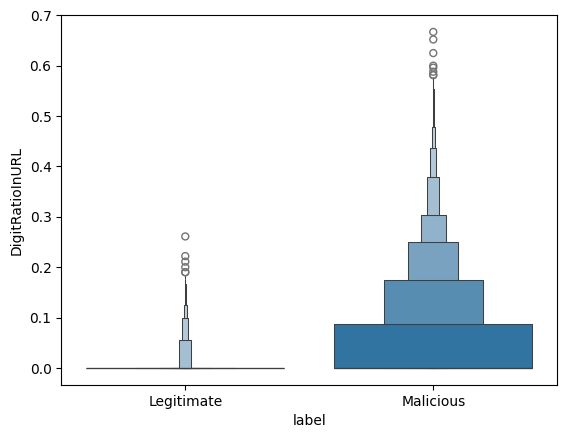

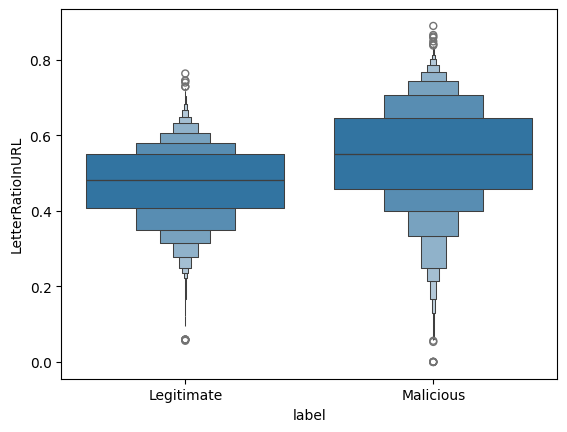

In [6]:
sns.boxenplot(x="label", y="DegitRatioInURL", data=df)
plt.ylabel("DigitRatioInURL")
plt.show()
sns.boxenplot(x="label", y="LetterRatioInURL", data=df)
plt.show()